<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [329]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [330]:
# Answer: 979 rows, 6 columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [331]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [332]:
# Answer: 120.97
movies.loc[:,"duration"].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [333]:
###sorting by duration>  movies.sort_values("duration")
shortest =movies.loc[:,["title","duration"]].sort_values("duration").head(1)
longest =movies.loc[:, ["title", "duration"]].sort_values("duration").tail(1)
print(shortest)
print(longest)



      title  duration
389  Freaks        64
      title  duration
476  Hamlet       242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

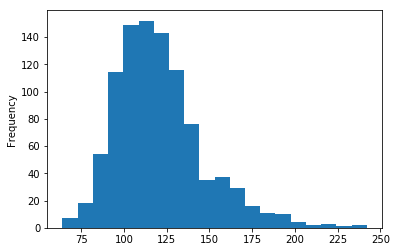

In [334]:
# Answer:
ax = movies.loc[:,"duration"].plot(kind="hist", bins=20);

#### Use a box plot to display that same data.

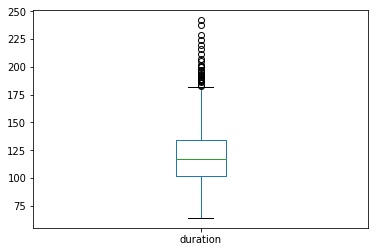

In [335]:
# Answer:
ax= movies.loc[:,"duration"].plot(kind="box");

## Intermediate level

#### Count how many movies have each of the content ratings.

In [336]:
# Answer:
movies.loc[:,"content_rating"].value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

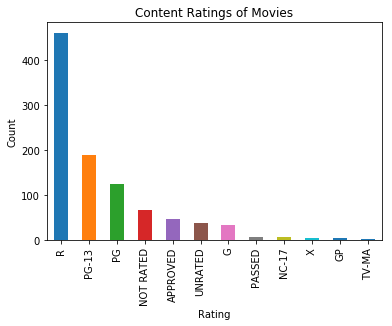

In [337]:
# Answer:
ax =movies.loc[:,"content_rating"].value_counts().plot(kind="bar")
ax.set_title("Content Ratings of Movies")
ax.set_xlabel("Rating")
ax.set_ylabel("Count");

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [338]:
not_rated=movies.loc[:,"content_rating"]== "NOT RATED" 
movies.loc[not_rated, "content_rating"] ="UNRATED"

In [339]:
approved=movies.loc[:,"content_rating"]== "APPROVED" 
movies.loc[approved, "content_rating"] ="UNRATED"

In [340]:
passed=movies.loc[:,"content_rating"]== "PASSED" 
movies.loc[passed, "content_rating"] ="UNRATED"
movies.loc[:,"content_rating"].value_counts(dropna=False)

R          460
PG-13      189
UNRATED    157
PG         123
G           32
NC-17        7
X            4
GP           3
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

In [341]:
gp=movies.loc[:,"content_rating"]== "GP" 
movies.loc[gp, "content_rating"] ="UNRATED"
movies.loc[:,"content_rating"].value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [342]:
# Answer:
x=movies.loc[:,"content_rating"]== "X" 
movies.loc[x, "content_rating"] ="NC-17"
movies.loc[:,"content_rating"].value_counts(dropna=False)


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       11
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

In [343]:
tv_ma=movies.loc[:,"content_rating"]== "TV-MA" 
movies.loc[tv_ma, "content_rating"] ="NC-17"
movies.loc[:,"content_rating"].value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
NaN          3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [344]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [345]:
# Answer: 
movies.loc[movies.loc[:,"content_rating"].isna(),:]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [346]:
movies.loc[:,"content_rating"] = movies.loc[:,"content_rating"].fillna(value="UNRATED")
movies.loc[:,"content_rating"].value_counts(dropna=False)

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [347]:
# Answer:
two_longer=movies.loc[:,"duration"]<=120
print("2 hours of longer:")
print(movies.loc[two_longer,"star_rating"].mean())

two_shorter=movies.loc[:,"duration"]>120
print("vs. shorter than 2 hours:")
print(movies.loc[two_shorter,"star_rating"].mean())


2 hours of longer:
7.8384898710865345
vs. shorter than 2 hours:
7.953669724770622


#### Use a visualization to detect whether there is a relationship between duration and star rating.

             star_rating  duration
star_rating     1.000000  0.227149
duration        0.227149  1.000000


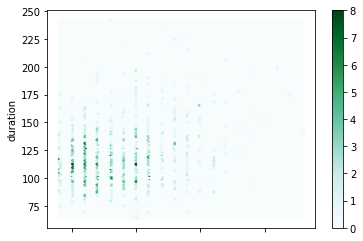

In [348]:
# Answer:
print(movies.corr())
ax=movies.plot(kind ="hexbin", x="star_rating", y="duration");

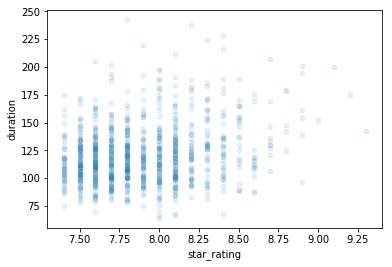

In [349]:
ax=movies.plot(kind ="scatter", x="star_rating", y="duration", alpha= .1);

#### Calculate the average duration for each genre.

In [350]:
# Answer:
movies.groupby("genre").agg({"duration":"mean"})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

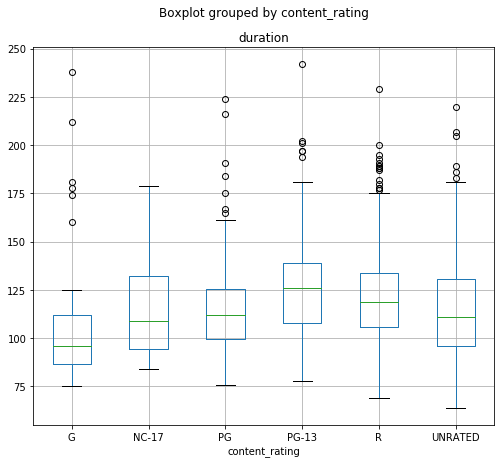

In [351]:
# Answer:
ax = movies.boxplot('duration', by="content_rating", figsize=(8, 7))

#### Find the title of the movie with the highest star rating in each genre

In [429]:
#Answer:
print(movies.groupby("genre").agg({"star_rating": "max"}))

genre_list=[]
for genre in movies.loc[:,"genre"]:
    genre_var="True"
    if genre in genre_list: 
        genre_var= "False"
    if genre_var=="True": 
        genre_list.append(genre)
print(genre_list)


for genre in genre_list:
        print(movies.loc[movies.loc[:,"genre"]==genre, :].sort_values("star_rating", ascending=False).head(1))

           star_rating
genre                 
Action             9.0
Adventure          8.9
Animation          8.6
Biography          8.9
Comedy             8.6
Crime              9.3
Drama              8.9
Family             7.9
Fantasy            7.7
Film-Noir          8.3
History            8.0
Horror             8.6
Mystery            8.6
Sci-Fi             8.2
Thriller           8.0
Western            8.9
['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography', 'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi', 'History', 'Thriller', 'Family', 'Fantasy']
   star_rating                     title content_rating  genre  duration  \
0          9.3  The Shawshank Redemption              R  Crime       142   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
   star_rating            title content_rating   genre  duration  \
3          9.0  The Dark Knight          PG-13  Action       152   

         

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [367]:
# Answer: The other columns of the films with the same title are not the same so not actually duplicates

movies.loc[:,"title"].value_counts()>1

dracula=movies.loc[:,"title"]=="Dracula"
true_grit=movies.loc[:,"title"]=="True Grit"
Les_miserables=movies.loc[:,"title"]=="Les Miserables"
Dragon_tattoo=movies.loc[:,"title"]=="The Girl with the Dragon Tattoo"


print(movies.loc[true_grit,:])
print(movies.loc[dracula,:])
print(movies.loc[Les_miserables,:])
print(movies.loc[Dragon_tattoo,:])

#print(movies.loc[dracula & true_grit & Les_miserables & Dragon_tattoo,:])  -> tried to do in one step result is empty 


     star_rating      title content_rating      genre  duration  \
662          7.7  True Grit          PG-13  Adventure       110   
936          7.4  True Grit        UNRATED  Adventure       128   

                                           actors_list  
662  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
936    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  
     star_rating    title content_rating   genre  duration  \
703          7.6  Dracula        UNRATED  Horror        85   
905          7.5  Dracula              R  Horror       128   

                                           actors_list  
703  [u'Bela Lugosi', u'Helen Chandler', u'David Ma...  
905  [u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...  
     star_rating           title content_rating  genre  duration  \
678          7.7  Les Miserables          PG-13  Drama       158   
924          7.5  Les Miserables          PG-13  Crime       134   

                                           actors_list  
678  [u

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

In [494]:
movies.groupby("genre").agg({"star_rating": "mean"})

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


#### Option 1: manually create a list of relevant genres, then filter using that list

In [507]:
# Answer:
#list of relevant genres:
print(movies.loc[:,"genre"].value_counts())
genres_over10= ["Drama", "Comedy","Action", "Crime", "Biography", "Adventure","Animation", "Horror", "Mystery"]
print(genres_over10)


for item in genres_over10: 
    print(item)
    print(movies.loc[movies.loc[:,"genre"]==item, "star_rating"].mean())

    


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64
['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
Drama
7.902517985611515
Comedy
7.82243589743591
Action
7.88455882352942
Crime
7.916935483870971
Biography
7.862337662337664
Adventure
7.933333333333332
Animation
7.914516129032259
Horror
7.8068965517241375
Mystery
7.975


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [479]:
# Answer:


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [524]:
movies.loc[:,"actors_list"].value_counts().head(10)


[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']         6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']           3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']      2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                   2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']     2
[u'Dustin Hoffman', u'Laurence Olivier', u'Roy Scheider']      1
[u'Cate Blanchett', u'Matt Damon', u'Liam Neeson']             1
[u'Tony Chiu Wai Leung', u'Wei Tang', u'Joan Chen']            1
[u'Daniel Day-Lewis', u'Madeleine Stowe', u'Russell Means']    1
[u'Jim Carrey', u'Kate Winslet', u'Tom Wilkinson']             1
Name: actors_list, dtype: int64